In [1]:
!pip install --upgrade scikit-learn
!pip install category_encoders
!pip install graphviz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.metrics import precision_score, recall_score, auc
from sklearn.metrics import roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import category_encoders as ce
import graphviz 

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

import warnings
warnings.filterwarnings('ignore')

In [3]:
## TASK1:
# to identify which coupon should be given to the person based on their 

In [4]:
### TASK2:

## PRESENT BASIC DESCRIPTION OF DATASET (FEATURES, DATATYPES, SUMMARY,SHAPE)
#load dataset into the dataframe
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
#preview the dataframe
print(df.head())
print('\n--------------\n')
# number of features, instances and datatypes
print(df.info())
print('\n--------------\n')
# summary statistics for continous numerical features
print(f'Summary Statistics for numberical features:\n {df.describe()}')
print('\n--------------\n')

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [5]:
#Check for duplicate rows
duplicates = df.duplicated(keep=False)
duplicate_rows = df[df.duplicated(keep=False)]
duplicates_num = duplicates.sum()
print(duplicate_rows)


     Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
97   Female  21.0    1.52    42.0                             no   no   3.0   
98   Female  21.0    1.52    42.0                             no   no   3.0   
105  Female  25.0    1.57    55.0                             no  yes   2.0   
106  Female  25.0    1.57    55.0                             no  yes   2.0   
145    Male  21.0    1.62    70.0                             no  yes   2.0   
174    Male  21.0    1.62    70.0                             no  yes   2.0   
179    Male  21.0    1.62    70.0                             no  yes   2.0   
184    Male  21.0    1.62    70.0                             no  yes   2.0   
208  Female  22.0    1.69    65.0                            yes  yes   2.0   
209  Female  22.0    1.69    65.0                            yes  yes   2.0   
282  Female  18.0    1.62    55.0                            yes  yes   2.0   
295  Female  16.0    1.66    58.0                   

visualization method to detect outliers


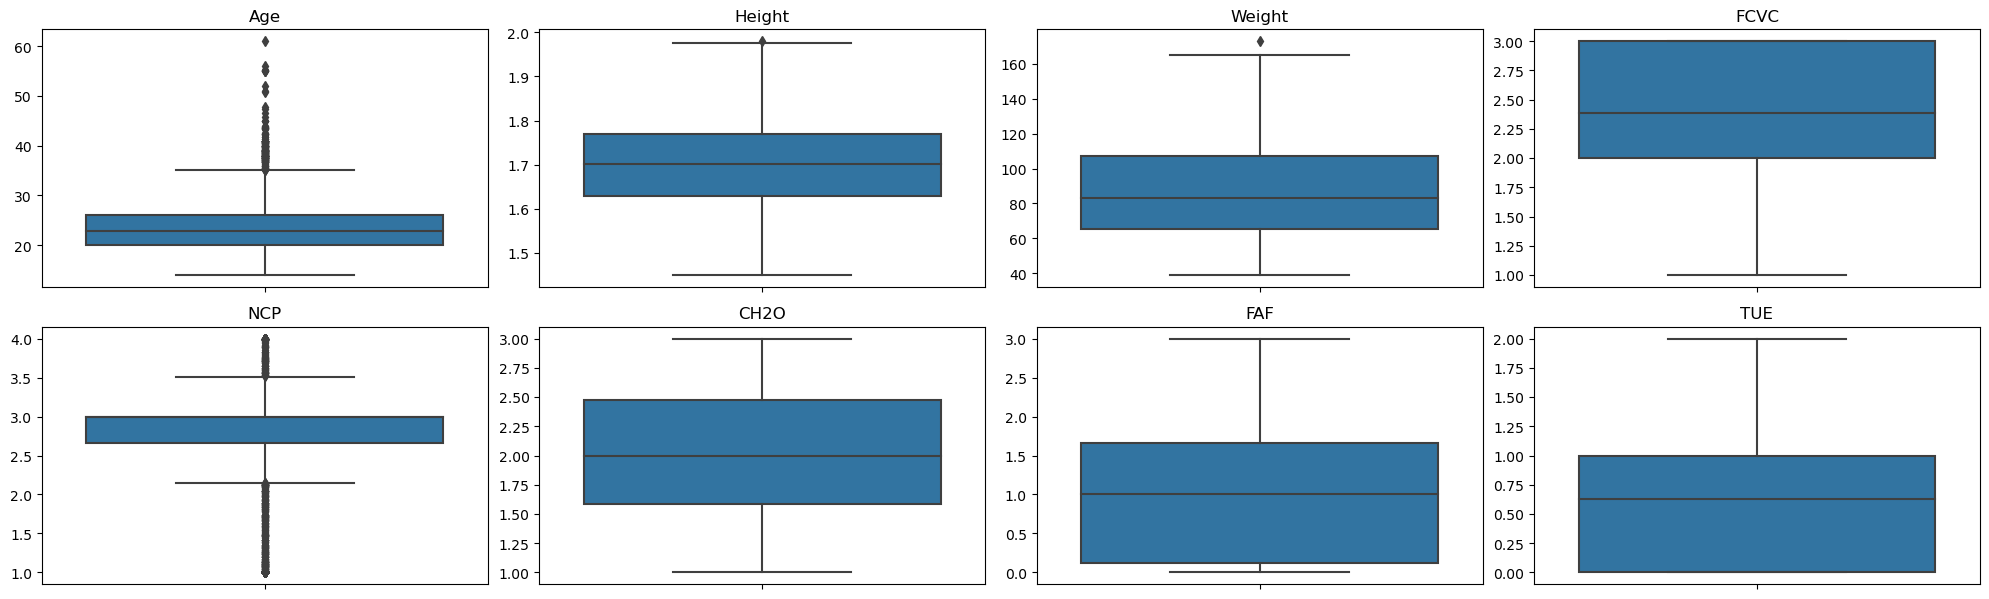

Amount of outliers by using IQR method:
 Age       168
Height      1
Weight      1
FCVC        0
NCP       579
CH2O        0
FAF         0
TUE         0
dtype: int64


In [6]:
#) Using visualization method to check if outliers occur:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(f'visualization method to detect outliers')
plt.figure(figsize=(20,12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel('')
    
plt.tight_layout()
plt.show()




# Using IQR method to detect outliers
# a) calculate IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Detect outliers as values beyond the lower and upper bounds (1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# b) detect outliers
outlier_mask = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound))
num_outliers = outlier_mask.sum()
print(f'Amount of outliers by using IQR method:\n {num_outliers}')

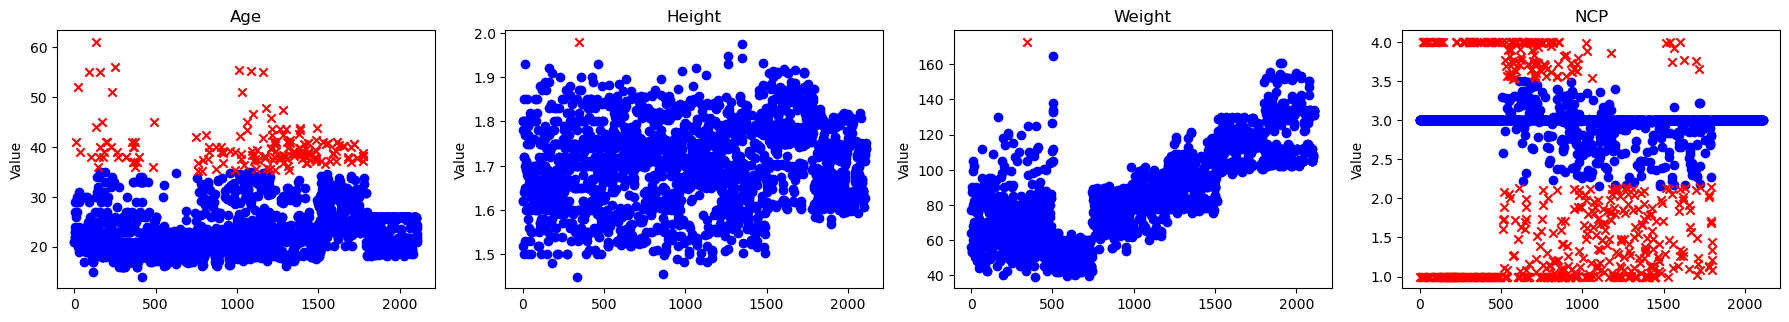

In [7]:
## visualize attributes contain outliers for further analysis
plt.figure(figsize=(18,12))
attributes_with_outliers = [col for col, num in num_outliers.items() if num>0]
for i, col in enumerate(attributes_with_outliers, 1):
    plt.subplot(4,4,i)
    plt.scatter(df.index[~outlier_mask[col]],df[col][~outlier_mask[col]], marker='o', label='Non-outlier', color ='blue')
    plt.scatter(df.index[outlier_mask[col]], df[col][outlier_mask[col]], marker='x', label='Outlier', color='red')
    plt.title(col)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

#### check for missing values in each columns
num_missing = df.isnull().sum()


print(num_missing)



In [8]:
#### Beside outliers, duplicate, there are some values that can be considered as noise because it not valid

In [9]:
####classification for data visualization
# categorical data columns
cate_cols = df.select_dtypes(include=['object']).columns
# continous numerical data
continous_cols = df.select_dtypes(include=['float64']).columns
# discrete numerical data
discrete_cols = df.select_dtypes(include=['int64']).columns


------ Distribution of Continous Numerical Data:


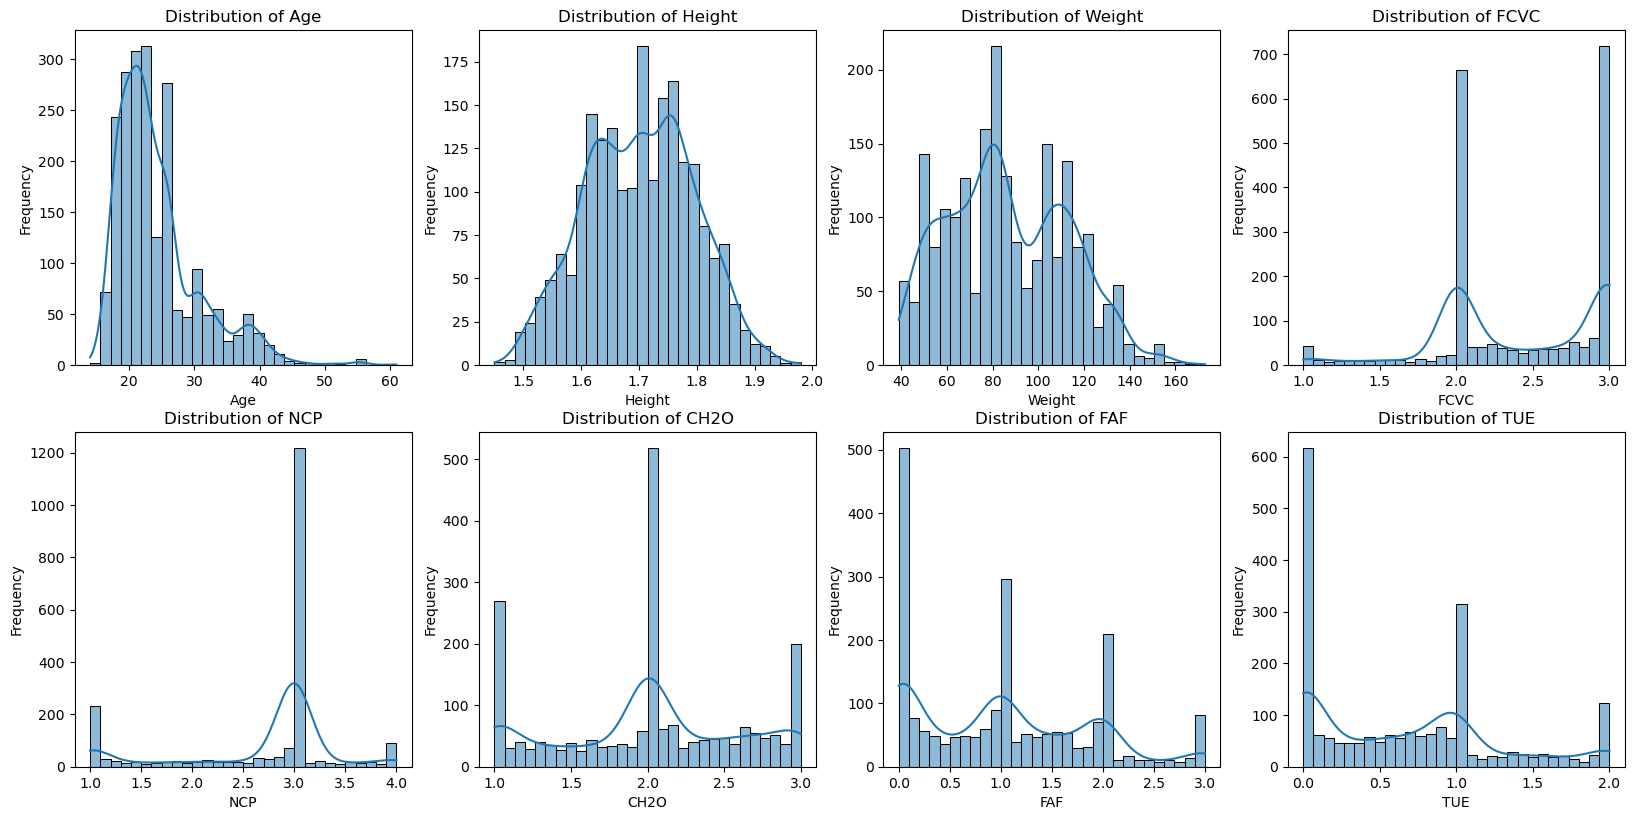

In [10]:
# visualizaiton for continous data
print("\n------ Distribution of Continous Numerical Data:")

plt.figure(figsize=(20, 20))
for i, col in enumerate(continous_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

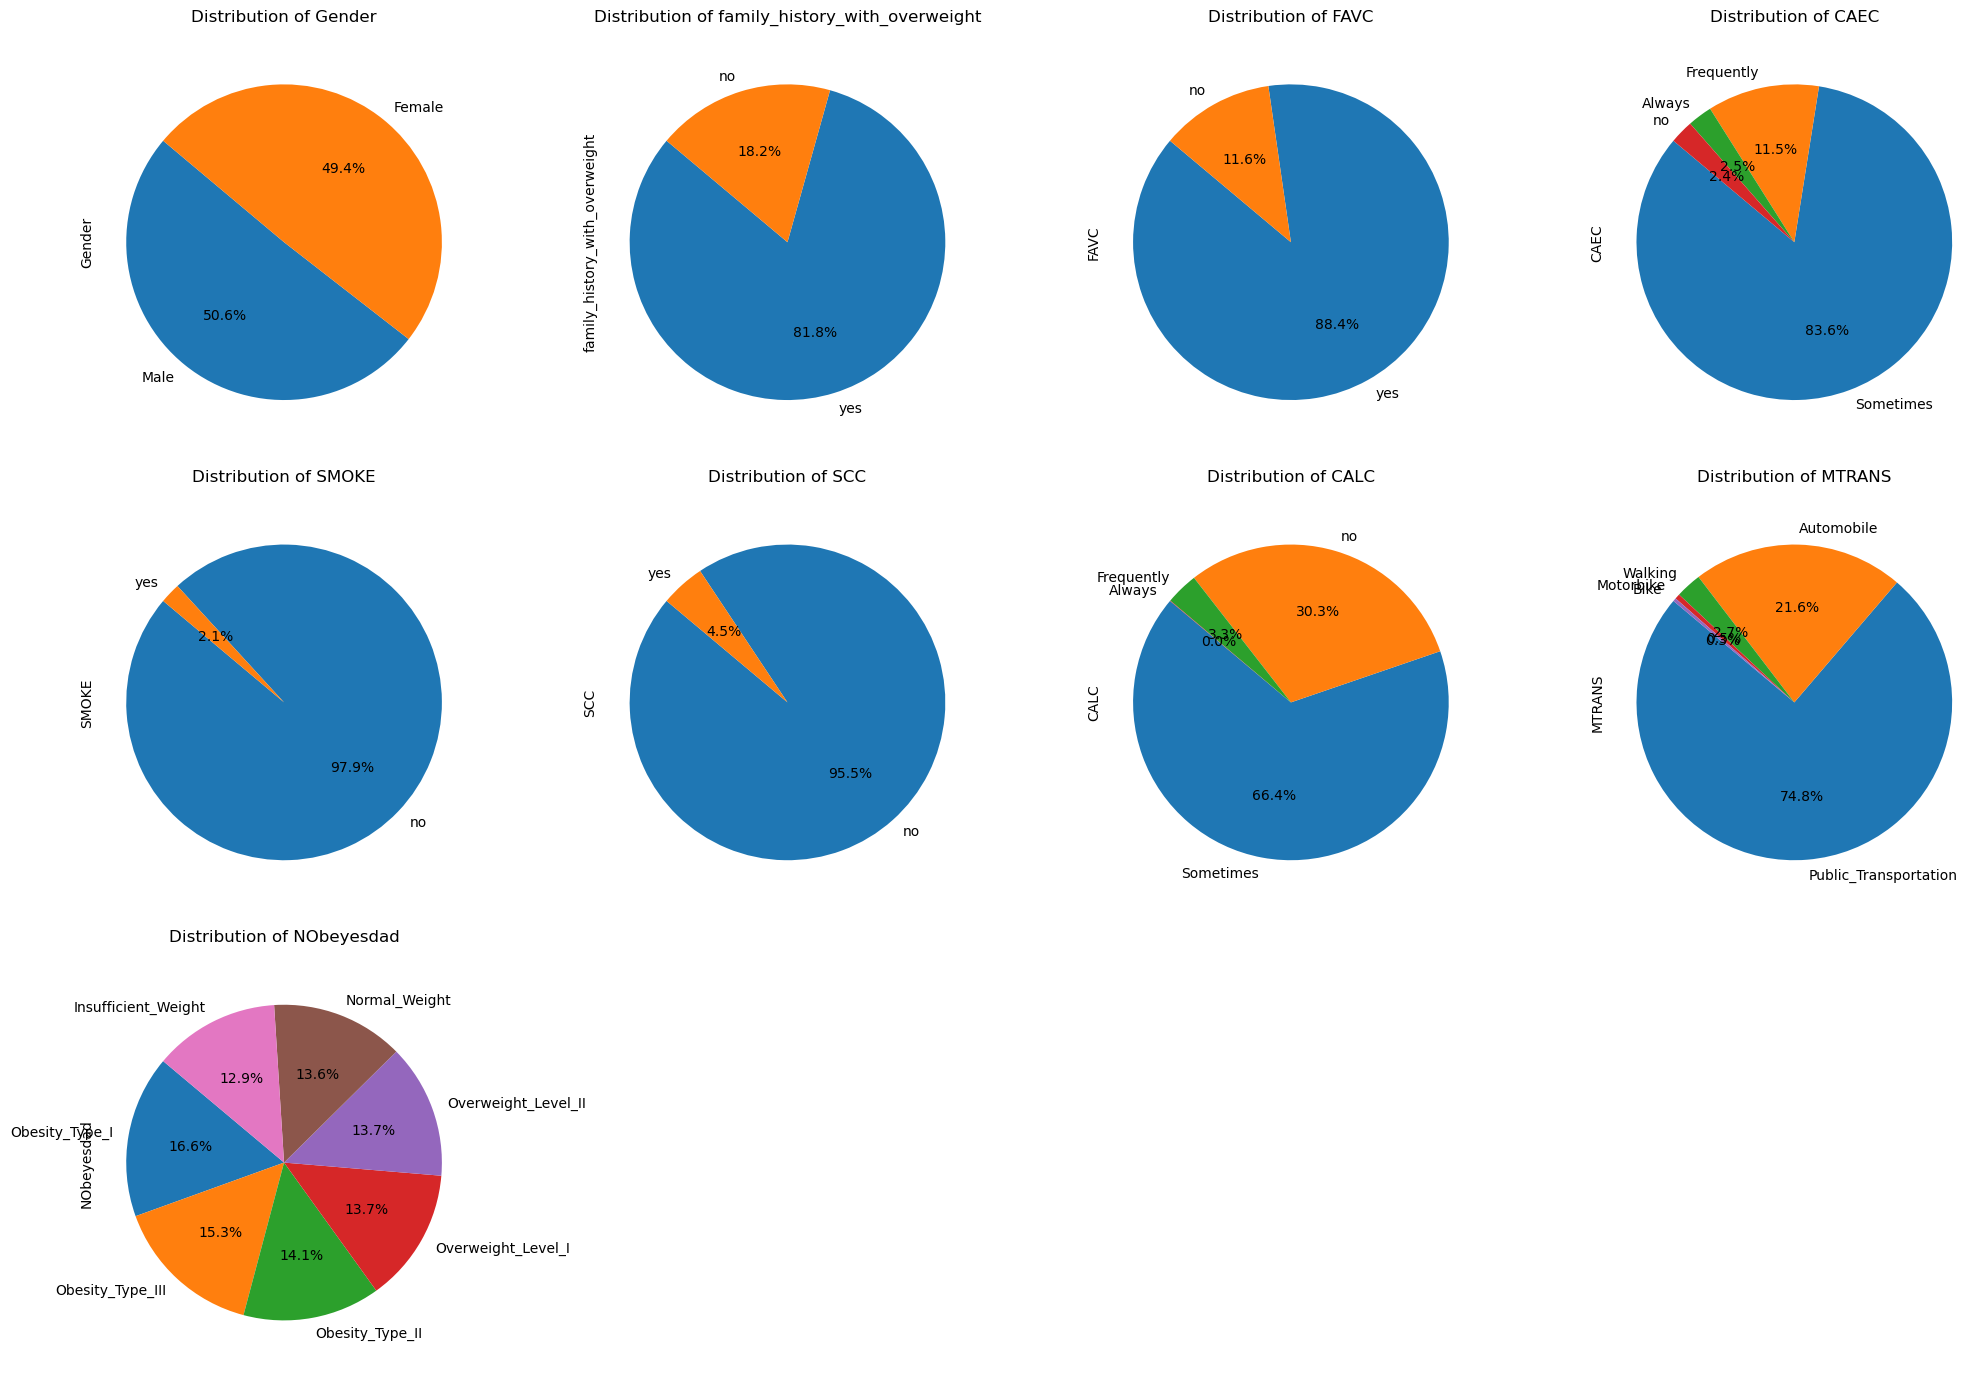

In [11]:
# visualization for categorical values
plt.figure(figsize=(20, 14))
for i, col in enumerate(cate_cols, 1):
    plt.subplot(3, 4, i)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {col}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

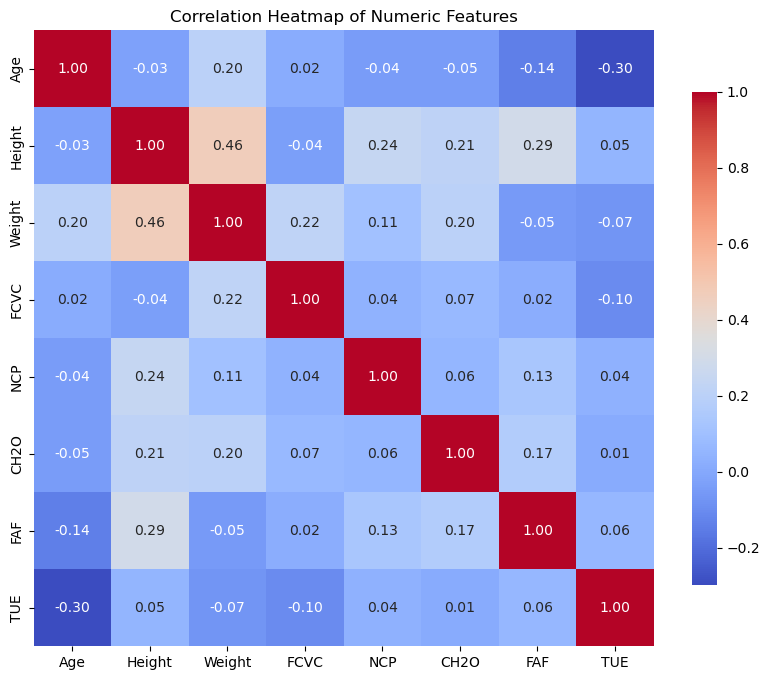

In [12]:


# Compute the correlation matrix for the numeric features
correlation_matrix = df[continous_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [13]:
### TASK3:
## DATA PREPROCESSING (identifying and dealing any missing/duplicate data or outliers )



## FIND THE FEATURES IMPORTANCE BASED ON FINAL CLASSIFICATION MODEL

## CREATE A MODEL USING THE DECISION TREE ALGORITHM

## GENERATE AND AXAMINE THE CONFUSION MATRIX

In [14]:
# remove duplicate
df.drop_duplicates(inplace=True)


In [15]:
# # check duplicated value after remove
duplicates = df.duplicated(keep=False)
duplicate_rows = df[df.duplicated(keep=False)]
duplicates_num = duplicates.sum()
print(f'number of duplicated value after remove: {duplicates_num}')


number of duplicated value after remove: 0


In [16]:
## correct missing values that imputed wrong
columns_to_round = ['FCVC', 'FAF', 'NCP','CH2O','TUE']

df[columns_to_round] = df[columns_to_round].round().astype(int)

# Display the first few rows after the rounding operation to verify
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   int32  
 7   NCP                             2087 non-null   int32  
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   int32  
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [18]:
####classification for data visualization with clean dataset
# categorical data columns
cate_cols = df.select_dtypes(include=['object']).columns
# continous numerical data
continuous_cols = df.select_dtypes(include=['float64']).columns
# discrete numerical data
discrete_cols = df.select_dtypes(include=['int64']).columns


------ Distribution of Continous Numerical Data:


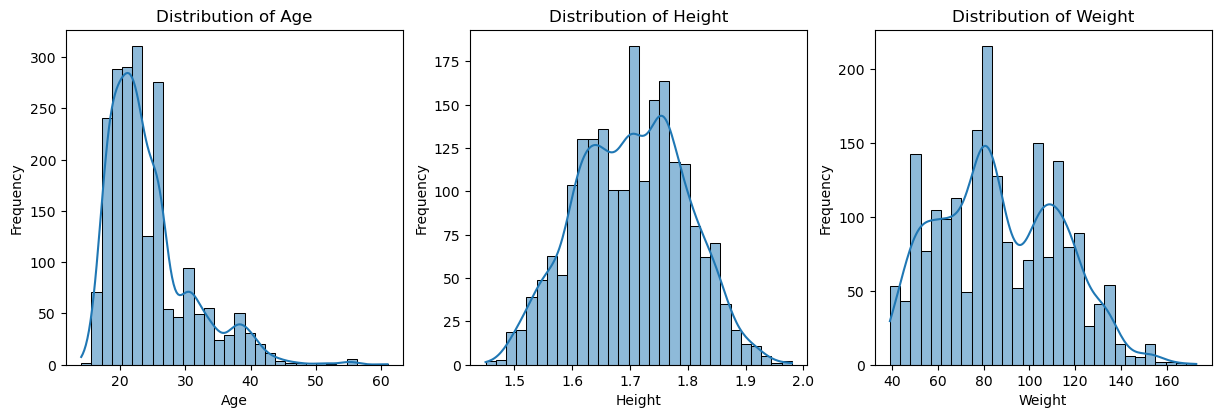

In [19]:


# visualizaiton for continous data
print("\n------ Distribution of Continous Numerical Data:")

plt.figure(figsize=(20, 20))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

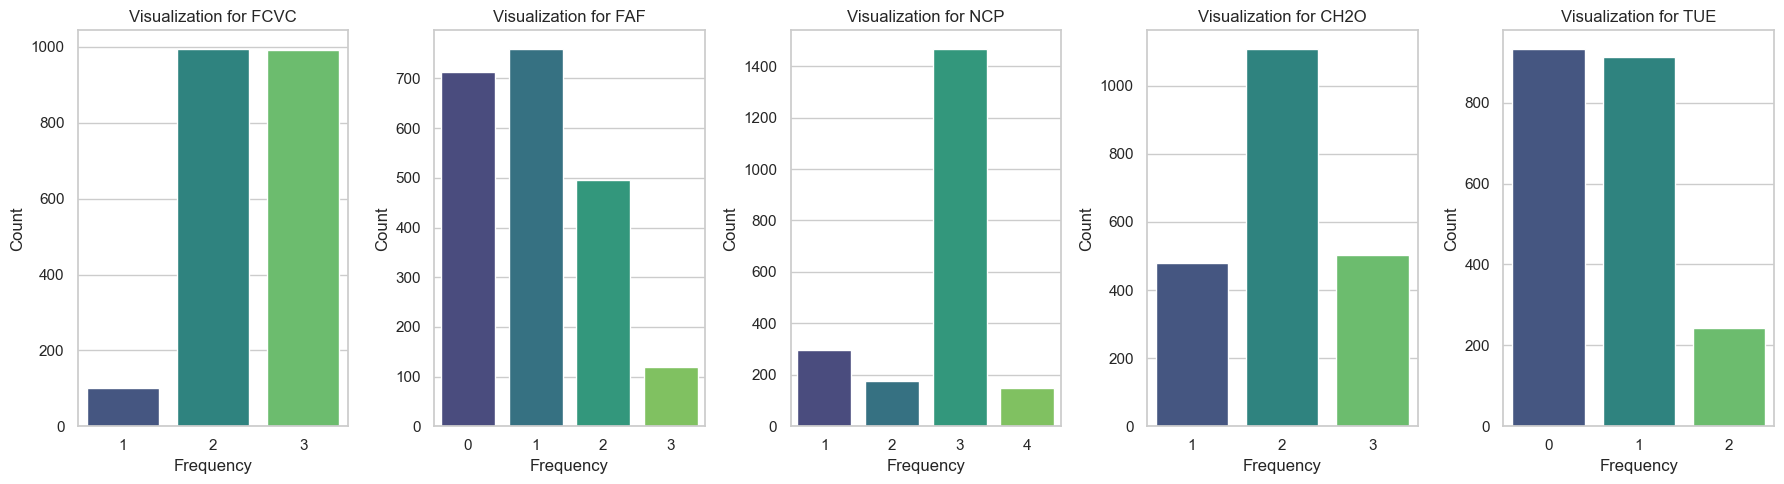

In [20]:

# Setting the style
sns.set(style="whitegrid")

# Creating subplots
fig, ax = plt.subplots(1, 5, figsize=(18, 5))
for i,col in enumerate (columns_to_round):
    sns.countplot(ax=ax[i], x=col, data=df, palette='viridis')
    ax[i].set_title(f'Visualization for {col}')
    ax[i].set_xlabel('Frequency')
    ax[i].set_ylabel('Count')



plt.tight_layout()
plt.show()


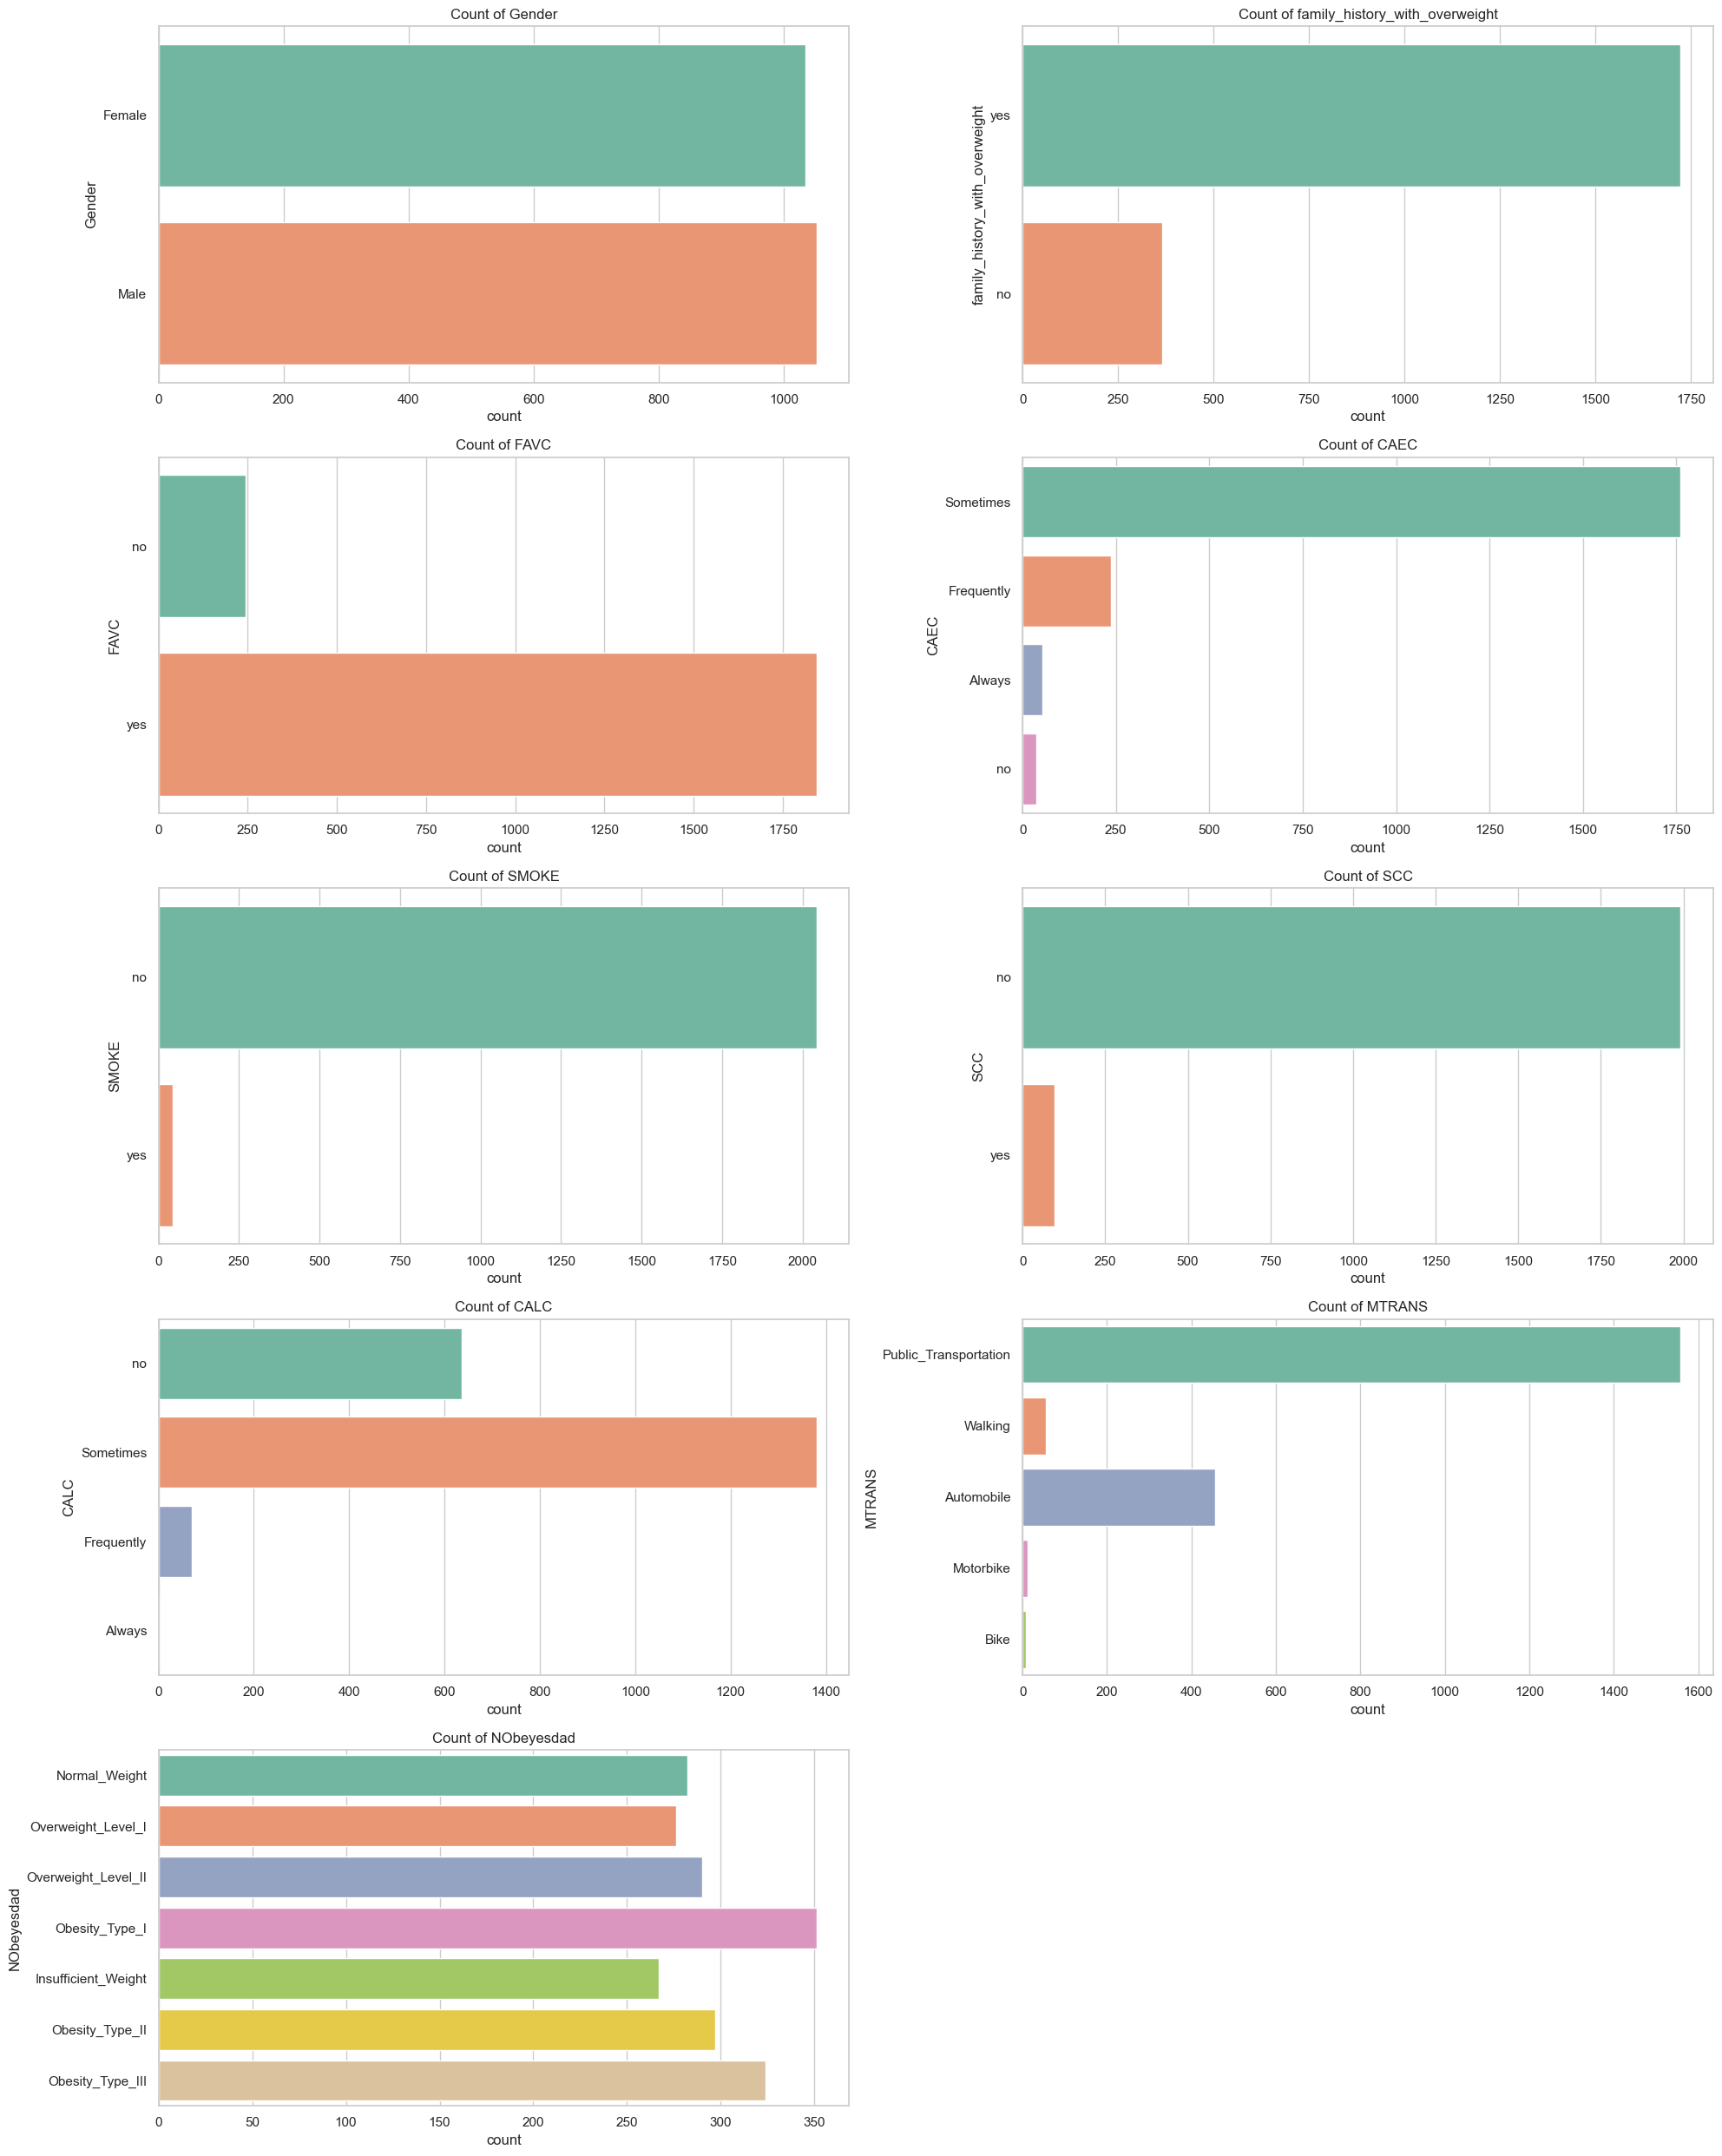

In [21]:

# Creating a figure to accommodate the subplots
plt.figure(figsize=(20, 25))

# Loop through the categorical attributes to create subplots for each
for i, attribute in enumerate(cate_cols, start=1):
    plt.subplot(5, 2, i)  # 5 rows, 2 columns
    sns.countplot(y=attribute, data=df, palette='Set2')
    plt.title(f'Count of {attribute}')
    plt.tight_layout()

plt.show()

In [22]:

X = df.drop(['NObeyesdad','Weight','Age','Gender','Height', 'family_history_with_overweight'], axis =1)
y = df['NObeyesdad']
encoder = ce.OrdinalEncoder(cate_cols)
X_enc = encoder.fit_transform(X)

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_enc,y, test_size =0.3)
X_train, y_train

(      FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS
 748      2     2    4     1      1     2    1    1    0     2       1
 585      2     2    3     1      1     1    1    0    1     2       1
 980      2     2    2     1      1     2    1    2    1     1       1
 1352     2     2    1     1      1     2    1    2    0     2       3
 1800     2     3    3     1      1     1    1    0    1     2       1
 ...    ...   ...  ...   ...    ...   ...  ...  ...  ...   ...     ...
 1050     2     3    1     1      1     1    1    2    0     2       1
 144      1     2    4     1      1     3    2    2    2     2       1
 1984     2     3    3     1      1     2    1    1    0     2       1
 1860     2     3    3     1      1     1    1    0    1     2       1
 816      2     2    3     1      1     2    1    0    2     2       1
 
 [1460 rows x 11 columns],
 748      Overweight_Level_I
 585     Insufficient_Weight
 980     Overweight_Level_II
 1352         Obesity_Type_I
 18

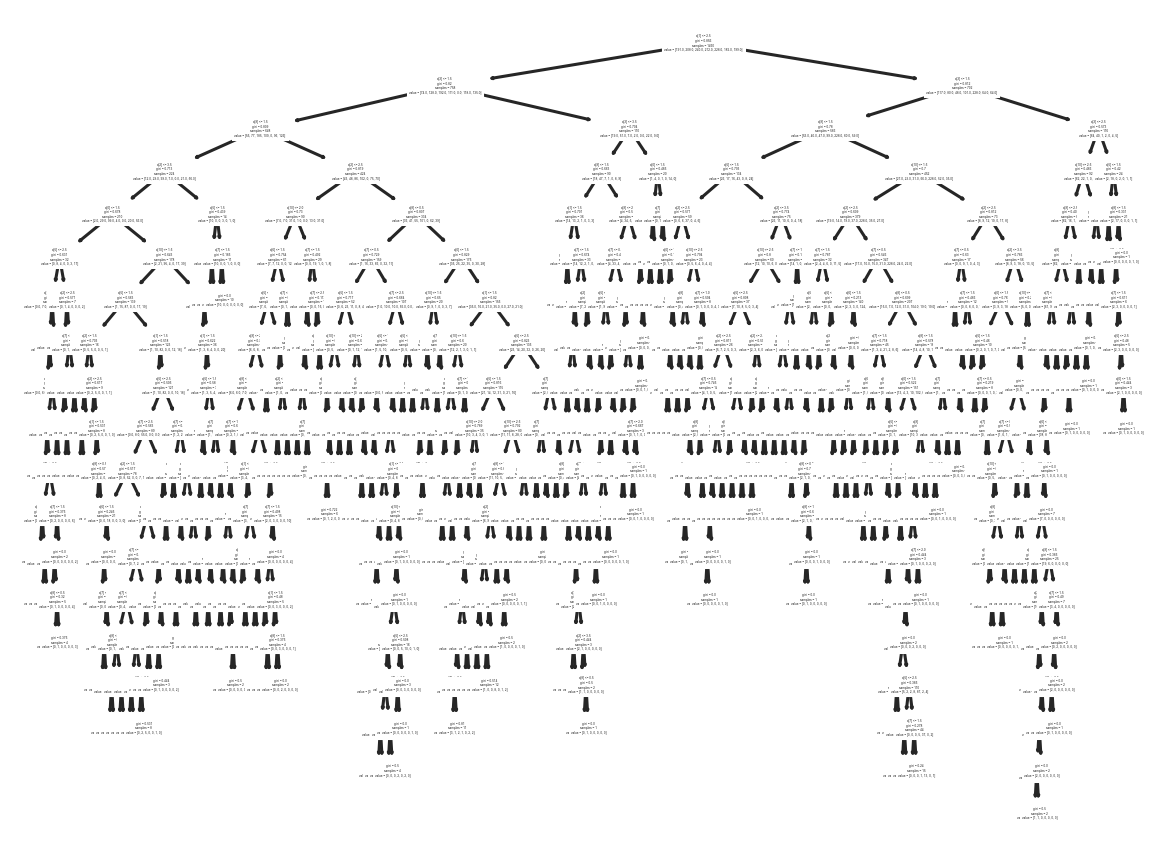

Number of tree nodes:  885
Model accuracy score with criterion gini index: 0.60


In [23]:
# build the base line of Decision Tree
dt = tree.DecisionTreeClassifier(random_state=47)
#Train Decision Tree Classifier
tdt=dt.fit(X_train,y_train)

#Plot Initial Decision Tree
plt.figure(dpi=220)
tree.plot_tree(tdt)
plt.show() #show the tree 

y_pred_gini = dt.predict(X_test)
print('Number of tree nodes: ', tdt.tree_.node_count)
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))

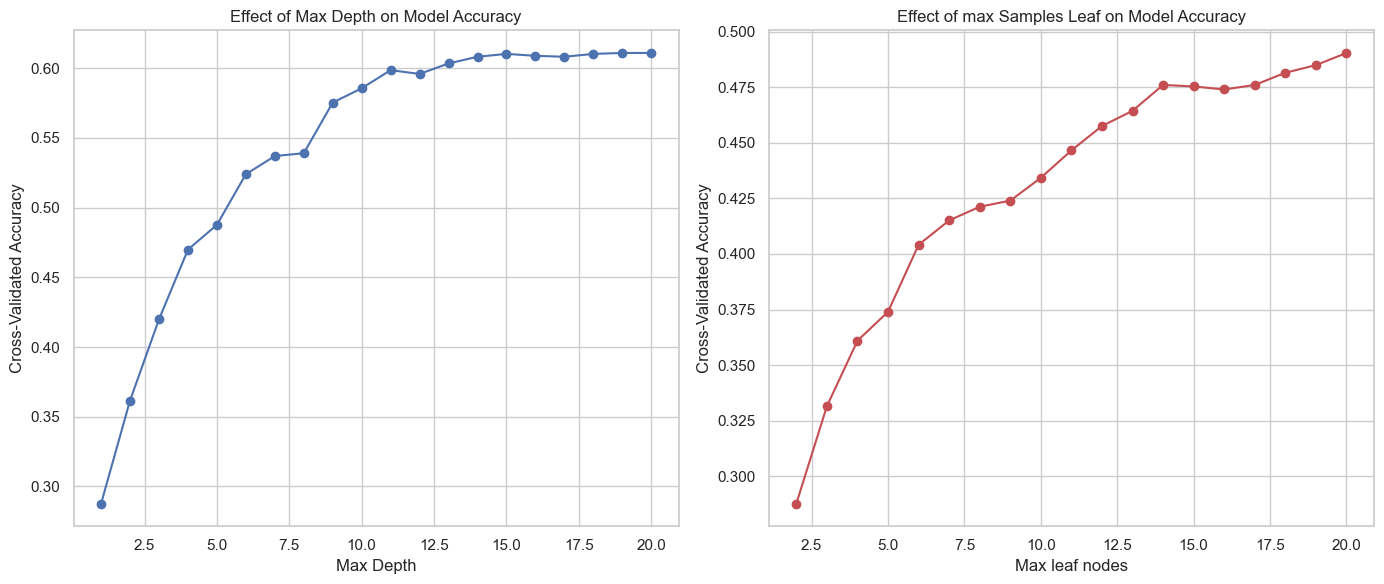

In [24]:

# Create a range of values for max_depth and leaf_node
max_depth_range = range(1, 21)
leaf_node_range = range(2, 21)

# Initialize lists to store results
max_depth_results = []
leaf_node_results = []


# Adjust max_depth
for max_depth in max_depth_range:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=47)
    cv = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
    max_depth_results.append(cv.mean())


# Adjust max_leaf_node
for max_leaf_nodes in leaf_node_range:
    dt = DecisionTreeClassifier(max_leaf_nodes =max_leaf_nodes, random_state=47)
    cv = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
    leaf_node_results.append(cv.mean())

# Plotting the results for max_depth
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(max_depth_range, max_depth_results, marker='o', linestyle='-', color='b')
plt.title('Effect of Max Depth on Model Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')

# Plotting the results for max_leaf_node
plt.subplot(1, 2, 2)
plt.plot(leaf_node_range,leaf_node_results, marker='o', linestyle='-', color='r')
plt.title('Effect of max Samples Leaf on Model Accuracy')
plt.xlabel('Max leaf nodes')
plt.ylabel('Cross-Validated Accuracy')

plt.tight_layout()
plt.show()



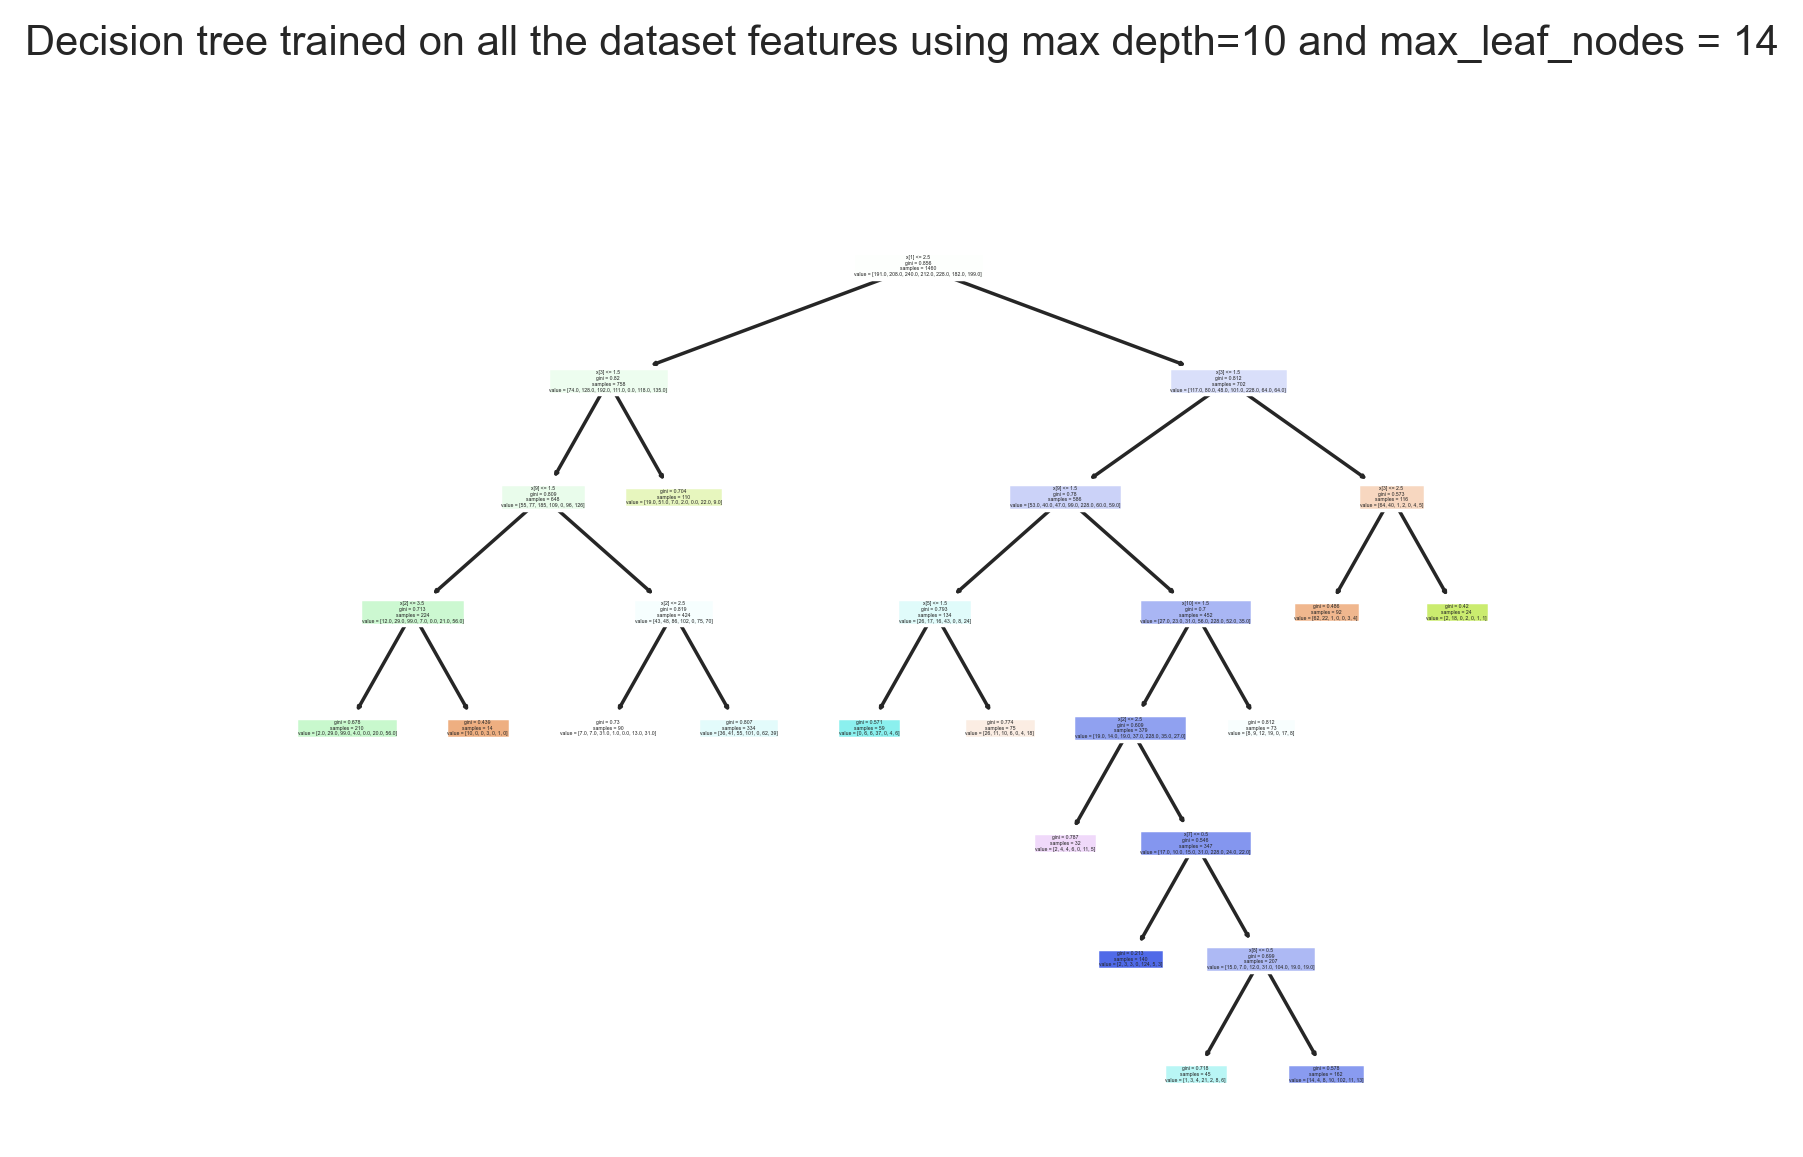

Number of tree nodes:  27
Model accuracy score with criterion gini index: 0.45


In [32]:
# Train the optimized decision tree model
final_optimized_dt = DecisionTreeClassifier(max_depth=10,max_leaf_nodes =14, random_state=47)
final_optimized_dt.fit(X_train, y_train)
#Plot adjusted Decision Tree
plt.figure(dpi=250)
tree.plot_tree(final_optimized_dt, filled = True)
plt.title("Decision tree trained on all the dataset features using max depth=10 and max_leaf_nodes = 14\n\n\n")
plt.show() #show the tree 

y_pred_gini = final_optimized_dt.predict(X_test)
print('Number of tree nodes: ', final_optimized_dt.fit(X_train, y_train).tree_.node_count)
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))

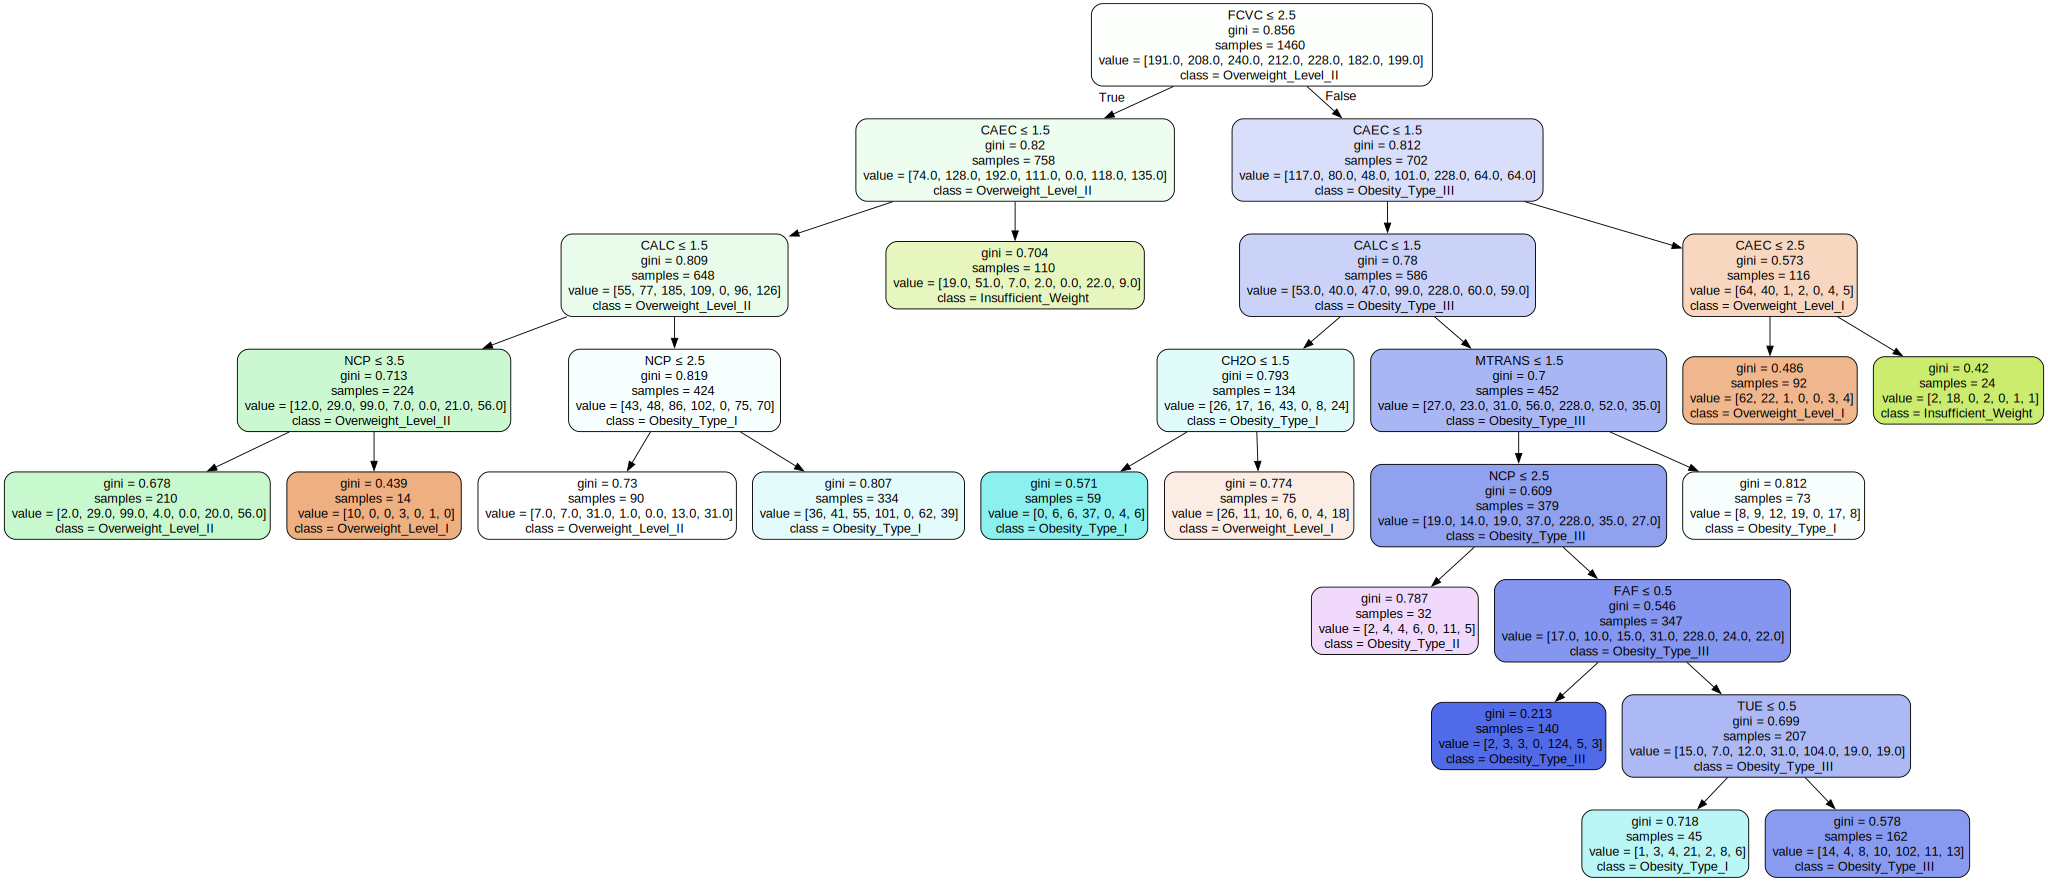

In [30]:
# Visualize decision-trees with graphviz

dot_data = tree.export_graphviz(final_optimized_dt, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

dt_opt_visgraph = graphviz.Source(dot_data) 
dt_opt_visgraph


   Feature  Importance
3     CAEC       0.258
1     FCVC       0.192
9     CALC       0.171
2      NCP       0.130
10  MTRANS       0.088
8      TUE       0.062
7      FAF       0.050
5     CH2O       0.048
0     FAVC       0.000
4    SMOKE       0.000
6      SCC       0.000


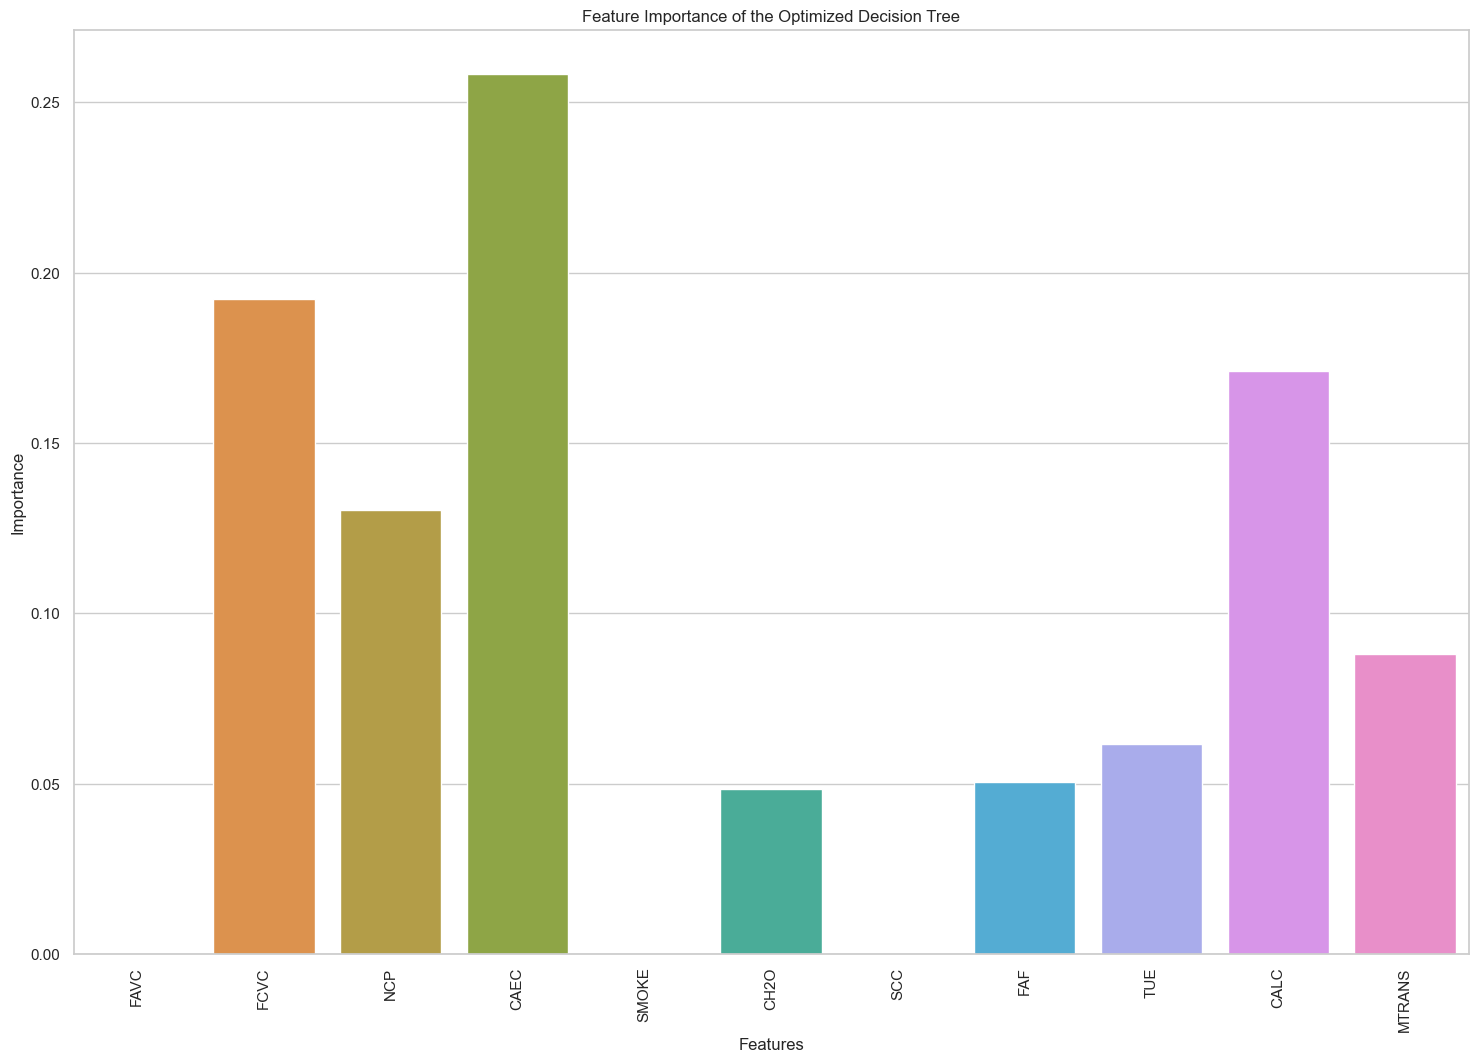

In [33]:
# Get feature importances from the optimized decision tree model
optimized_feature_importances = final_optimized_dt.feature_importances_
importances = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(optimized_feature_importances,3)})
importances = importances.sort_values('Importance',ascending=False)
print(importances)
# Visualization of feature importances
plt.figure(figsize=(18, 12))
sns.barplot(x=X_train.columns, y=optimized_feature_importances)
plt.title('Feature Importance of the Optimized Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

[[35 14  6 10 10  1  0]
 [13 25  9 21  3  3  0]
 [ 9  4 48 45  3  2  0]
 [ 1  0  3 77  3  1  0]
 [ 2  0  0  0 94  0  0]
 [ 5 13 23 41  7  5  0]
 [16  2 43 24  4  2  0]]


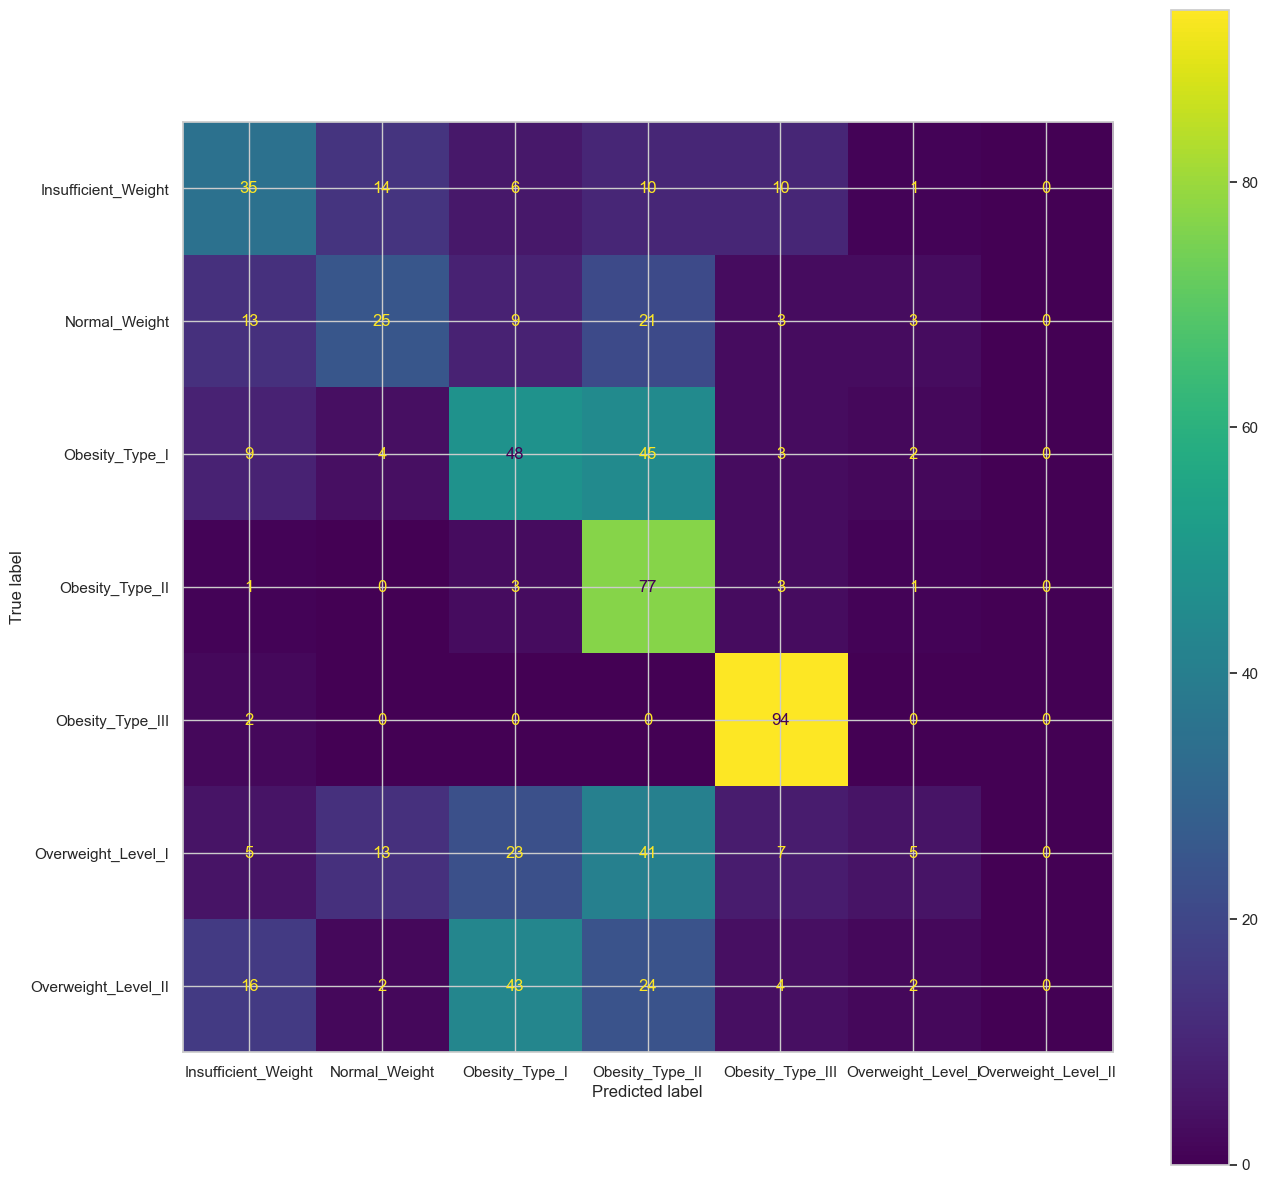

In [35]:
# Generate predictions using the optimized model for evaluation
optimized_y_pred = final_optimized_dt.predict(X_test)

# Generate confusion matrix for the optimized model
optimized_conf_matrix = confusion_matrix(y_test, optimized_y_pred)

print(optimized_conf_matrix)

 
disp = ConfusionMatrixDisplay(confusion_matrix=optimized_conf_matrix,display_labels=final_optimized_dt.classes_) 
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)

In [37]:
# generate classification report for final Decision Tree
optimized_class_report = classification_report(y_test, optimized_y_pred, target_names=final_optimized_dt.classes_)

print(optimized_class_report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.43      0.46      0.45        76
      Normal_Weight       0.43      0.34      0.38        74
     Obesity_Type_I       0.36      0.43      0.40       111
    Obesity_Type_II       0.35      0.91      0.51        85
   Obesity_Type_III       0.76      0.98      0.85        96
 Overweight_Level_I       0.36      0.05      0.09        94
Overweight_Level_II       0.00      0.00      0.00        91

           accuracy                           0.45       627
          macro avg       0.39      0.45      0.38       627
       weighted avg       0.39      0.45      0.38       627

